# Naive Bayes

In this notebook, we explore various Naive Bayes classifiers to determine the most suitable one for our dataset. We begin by evaluating the performance of different Naive Bayes classifiers, including GaussianNB, CategoricalNB, and BernoulliNB, on the given training data. After identifying the best-performing classifier, we attempt to further improve the classification accuracy by using altered or partial training data.

The steps involved in this notebook are as follows:
1. **Initial Exploration**: Evaluate the performance of GaussianNB, CategoricalNB, and BernoulliNB classifiers on the training data.
2. **Feature Selection**: Focus on binary and ordinal features to enhance the performance of the BernoulliNB, CategoricalNB and ComplementNB classifier, respectively.
3. **Hyperparameter Tuning**: Use GridSearchCV to tune hyperparameters for the CategoricalNB and ComplementNB classifier.
4. **Dimensionality Reduction**: Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and evaluate the classifier's performance on the reduced data.
5. **Cross Validation with Under- and Oversampling**: Use sampling techniques to address the imbalance of the target variable and cross validation to ensure robust model performance.
6. **Model Comparison**: Plot ROC curves and precision-recall curves for models tuned on different scoring metrics to visualize the classifier's performance.

By following these steps, we aim to identify the most effective Naive Bayes classifier and optimize its performance for our specific dataset.

## Initial Exploration

Loading the data

In [5]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
X_train, y_train = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

In [6]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7692367149758454
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85     21797
         1.0       0.36      0.57      0.44      4078

    accuracy                           0.77     25875
   macro avg       0.63      0.69      0.65     25875
weighted avg       0.82      0.77      0.79     25875



In [7]:
from sklearn.naive_bayes import CategoricalNB

# Initialize the classifier
nb_classifier = CategoricalNB(alpha=1)

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8061062801932367
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     21797
         1.0       0.41      0.52      0.46      4078

    accuracy                           0.81     25875
   macro avg       0.66      0.69      0.67     25875
weighted avg       0.83      0.81      0.81     25875



In [8]:
from sklearn.naive_bayes import BernoulliNB

# Initialize the classifier
nb_classifier = BernoulliNB(alpha=1)

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8205217391304348
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     21797
         1.0       0.42      0.35      0.38      4078

    accuracy                           0.82     25875
   macro avg       0.65      0.63      0.64     25875
weighted avg       0.81      0.82      0.81     25875



The Bernoulli Naive Bayes classifier achieves the highest accuracy (82.3%), followed by the Categorical Naive Bayes classifier (80.6%) and the Gaussian Naive Bayes classifier (76.8%). This outcome aligns with the nature of the training data: most features are either binary (14) or categorical (5), while only 2 features follow a normal distribution. Therefore, the Bernoulli classifier performs best, as it is specifically optimized for binary data. The Categorical Naive Bayes classifier also performs relatively well, as it is suited to categorical data, which is prevalent in this dataset. In contrast, the Gaussian Naive Bayes classifier, which assumes normally distributed features, achieves the lowest accuracy due to the limited number of features with a normal distribution. 

However, these results are not really promising, as all classifiers achieve a quite low recall on the positive target variable. Since we want to predict a disease, recall is an important metric because we want to make sure that we do not miss any positive cases.

Let's see if we can improve this.

## Feature selection

### Binary feature selection

In [9]:
binary_features = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]

In [10]:
# Select the binary features
X_train_binary = X_train[binary_features]

# Initialize the classifier
nb_classifier = BernoulliNB(alpha=1)

# Train the classifier
nb_classifier.fit(X_train_binary, y_train)

# Make predictions on the validation set
X_val_binary = X_val[binary_features]
y_val_pred = nb_classifier.predict(X_val_binary)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8241159420289855
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     21797
         1.0       0.42      0.32      0.36      4078

    accuracy                           0.82     25875
   macro avg       0.65      0.62      0.63     25875
weighted avg       0.81      0.82      0.81     25875



Using only binary features for the Bernoulli Naive Bayes classifier **increases** the accuracy slightly. However, the recall on the positive class is quite low. 

### Ordinal feature selection

In [11]:
ordinal_features = [
    "GenHlth",
    "Age",
    "Education",
    "Income",
]

In [12]:
x_train_categorical = X_train[ordinal_features]

# Initialize the classifier
nb_classifier = CategoricalNB(alpha=1)

# Train the classifier
nb_classifier.fit(x_train_categorical, y_train)

# Make predictions on the validation set
X_val_categorical = X_val[ordinal_features]
y_val_pred = nb_classifier.predict(X_val_categorical)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8227632850241546
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     21797
         1.0       0.40      0.26      0.31      4078

    accuracy                           0.82     25875
   macro avg       0.64      0.59      0.61     25875
weighted avg       0.80      0.82      0.81     25875



Using ordinal and binary features for training the CategoricalNB classifier.

In [13]:
# Using binary and ordinal features
X_train_combined = X_train_binary.join(x_train_categorical)

# Initialize the classifier
nb_classifier = CategoricalNB(alpha=1)

# Train the classifier
nb_classifier.fit(X_train_combined, y_train)

# Make predictions on the validation set
X_val_combined = X_val_binary.join(X_val_categorical)
y_val_pred = nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.804792270531401
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     21797
         1.0       0.40      0.50      0.45      4078

    accuracy                           0.80     25875
   macro avg       0.65      0.68      0.66     25875
weighted avg       0.82      0.80      0.81     25875



In [14]:
from sklearn.naive_bayes import ComplementNB
# Initialize the classifier
nb_classifier = ComplementNB(alpha=1)

# Train the classifier
nb_classifier.fit(X_train_combined, y_train)

# Make predictions on the validation set
X_val_combined = X_val_binary.join(X_val_categorical)
y_val_pred = nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7218164251207729
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82     21797
         1.0       0.32      0.68      0.43      4078

    accuracy                           0.72     25875
   macro avg       0.62      0.70      0.62     25875
weighted avg       0.83      0.72      0.76     25875



Using ordinal and binary feature to train the CategoricalNB classifier achieves a lower accuracy (-1.8%). However, the recall on the positive class is 24% higher and as we want to give a medical diagnosis, we want to make sure that we do not miss a positive class. Therefore, a higher recall is more important than a slightly better accuracy.

### Precision-Recall Curves for different Classifier

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Function to plot Precision-Recall Curve for multiple classifiers
def plot_precision_recall_curve(
    classifiers, X_train, y_train, X_val, y_val, feature_set_name
):
    plt.figure(figsize=(10, 8))

    for clf, clf_name in classifiers:
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict probabilities
        y_val_prob = clf.predict_proba(X_val)[:, 1]

        # Compute Precision-Recall curve and average precision
        precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
        average_precision = average_precision_score(y_val, y_val_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f"{clf_name} (AP = {average_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({feature_set_name})")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

Precision-Recall Curve on all Features

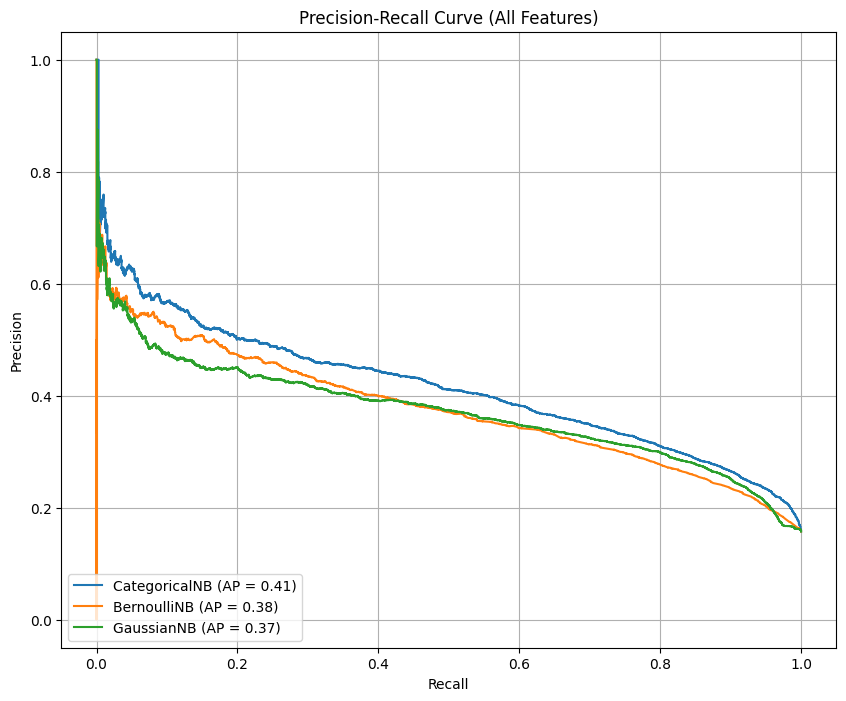

In [16]:
# List of classifiers to plot
classifiers = [
    (CategoricalNB(alpha=1), "CategoricalNB"),
    (BernoulliNB(alpha=1), "BernoulliNB"),
    (GaussianNB(), "GaussianNB")
]

# Plot Precision-Recall Curve for multiple classifiers on all features
plot_precision_recall_curve(
    classifiers,
    X_train,
    y_train,
    X_val,
    y_val,
    "All Features"
)

Precision-Recall Curves on ordinal and binary features

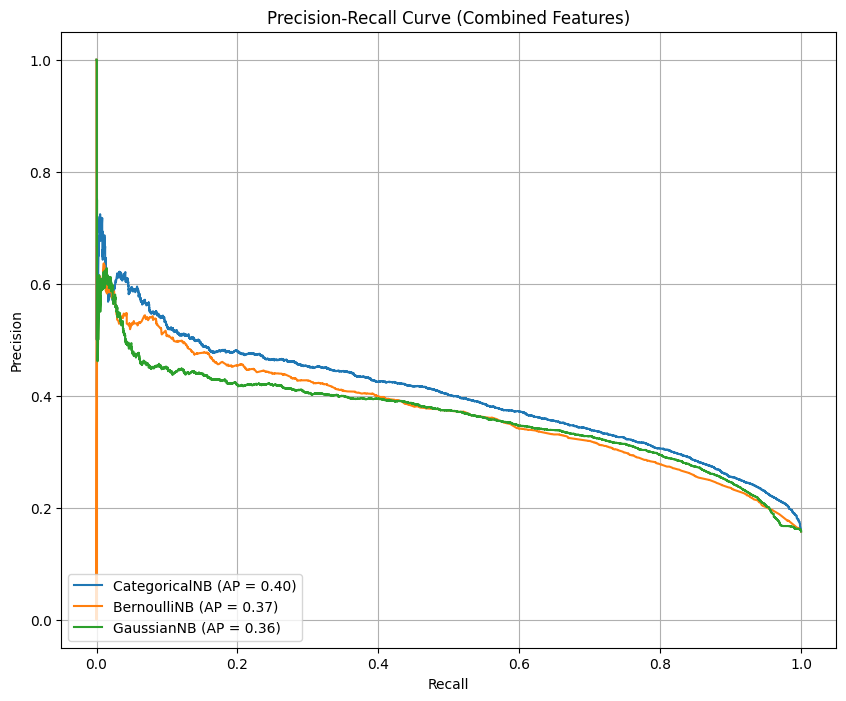

In [17]:
# Plot Precision-Recall Curve for multiple classifiers
plot_precision_recall_curve(
    classifiers,
    X_train_combined,
    y_train,
    X_val_combined,
    y_val,
    "Combined Features"
)

Precision-Recall Curves on only binary features

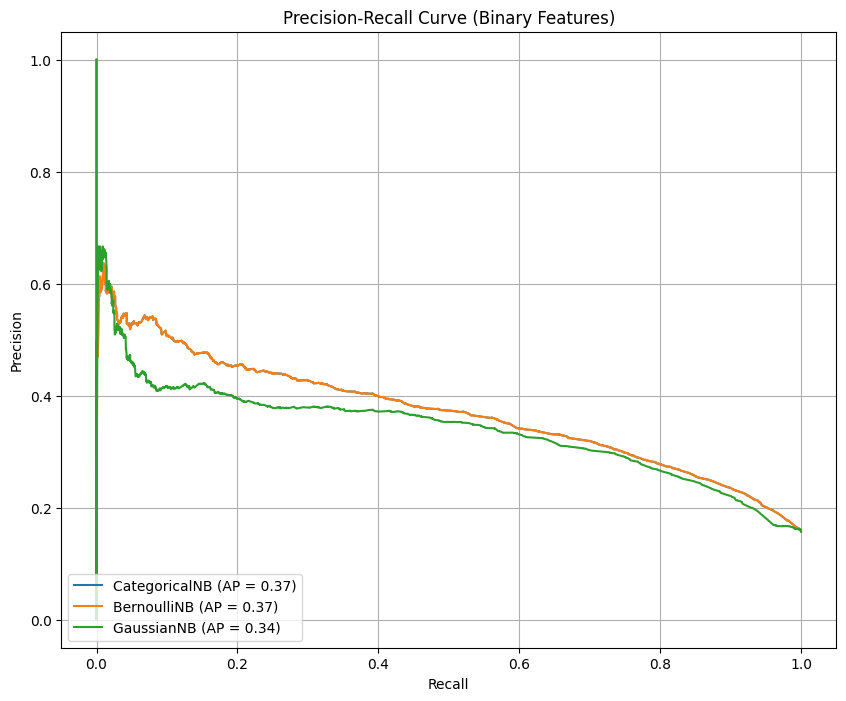

In [18]:
# Plot Precision-Recall Curve for multiple classifiers
plot_precision_recall_curve(
    classifiers,
    X_train_binary,
    y_train,
    X_val_binary,
    y_val,
    "Binary Features"
)

We can see that the CategoricalNB achieves the best performance on almost every feature set (for binary features equal to BernoulliNB). It performs best with the entire features set. Nonetheless, the performance on the combined feature set (binary and ordinal) is similarly good.

## Hyperparameter Tuning

Hyperparemeter tuning with all featuers on the CategoricalNB

In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid
param_grid_cat = {
    "alpha": [0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 50.0],
    "fit_prior": [True, False],
    "min_categories": [1, 3, 5, 10, 15, 25, 50],
}

# Initialize the classifier
nb_classifier = CategoricalNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_cat,
    cv=stratified_10_fold_cv,
    scoring="accuracy",
)

# Perform the grid search on the binary features
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 50.0, 'fit_prior': True, 'min_categories': 50}
Best Score: 0.8322689678405087
Validation Accuracy with Best Parameters: 0.8314975845410628
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     21797
         1.0       0.46      0.35      0.40      4078

    accuracy                           0.83     25875
   macro avg       0.67      0.64      0.65     25875
weighted avg       0.82      0.83      0.82     25875



Hyperparemeter tuning on the combined feature set (binary and ordinal)

In [20]:
# Initialize the classifier
nb_classifier = CategoricalNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_cat,
    cv=stratified_10_fold_cv,
    scoring="accuracy",
)

# Perform the grid search on the binary features
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 50.0, 'fit_prior': True, 'min_categories': 50}
Best Score: 0.8310807338673651
Validation Accuracy with Best Parameters: 0.8310338164251208
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     21797
         1.0       0.45      0.32      0.38      4078

    accuracy                           0.83     25875
   macro avg       0.66      0.62      0.64     25875
weighted avg       0.81      0.83      0.82     25875



Also tuning the ComplementNB classifier on the combined feature set

In [21]:
# Define the parameter grid
param_grid_comp = {
    "alpha": [0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 50.0, 100.0],
    "fit_prior": [True, False],
}

# Initialize the classifier
nb_classifier = ComplementNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_comp,
    cv=stratified_10_fold_cv,
    scoring="accuracy",
)

# Perform the grid search on the binary features
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 100.0, 'fit_prior': True}
Best Score: 0.720587200016227
Validation Accuracy with Best Parameters: 0.722975845410628
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82     21797
         1.0       0.32      0.67      0.43      4078

    accuracy                           0.72     25875
   macro avg       0.62      0.70      0.63     25875
weighted avg       0.83      0.72      0.76     25875



As before, the accuarcy is quite high, but recall is quite low. Let's see if we can further improve this by tunining on the metric *recall*.

In [22]:
# Initialize the classifier
nb_classifier = CategoricalNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_cat,
    cv=stratified_10_fold_cv,
    scoring="recall",
)

# Perform the grid search on the binary features
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 0.1, 'fit_prior': False, 'min_categories': 1}
Best Score: 0.7250221985233671
Validation Accuracy with Best Parameters: 0.7347632850241546
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     21797
         1.0       0.34      0.72      0.46      4078

    accuracy                           0.73     25875
   macro avg       0.64      0.73      0.64     25875
weighted avg       0.84      0.73      0.77     25875



In [23]:
# Initialize the classifier
nb_classifier = CategoricalNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_cat,
    cv=stratified_10_fold_cv,
    scoring="recall",
)

# Perform the grid search on the binary features
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 0.5, 'fit_prior': False, 'min_categories': 1}
Best Score: 0.7234852077518751
Validation Accuracy with Best Parameters: 0.7255265700483092
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82     21797
         1.0       0.33      0.73      0.45      4078

    accuracy                           0.73     25875
   macro avg       0.63      0.73      0.64     25875
weighted avg       0.84      0.73      0.76     25875



In [24]:
# Initialize the classifier
nb_classifier = ComplementNB()

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_grid_comp,
    cv=stratified_10_fold_cv,
    scoring="recall",
)

# Perform the grid search on the binary features
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the validation set
best_nb_classifier = grid_search.best_estimator_
y_val_pred = best_nb_classifier.predict(X_val_combined)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Score: 0.6719910434672243
Validation Accuracy with Best Parameters: 0.7217777777777777
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82     21797
         1.0       0.32      0.67      0.43      4078

    accuracy                           0.72     25875
   macro avg       0.62      0.70      0.62     25875
weighted avg       0.83      0.72      0.76     25875



It seems that the choice of hyperparemeters is opposing for optimising on the different metrics (*accuracy* and *recall*). When optimizing on accuracy, the classifier performs best when the smoothing parameter *alpha* and the number of categories is as large as possible. On the other hand, for a high recall, those paremeters should be as low as possible.

### Interpretation of Hyperparameter Tuning

The hyperparameter tuning did not really improve the performance of the Naive Bayes classifier. This outcome can be attributed to the nature of the Naive Bayes classifiers, which is inherently simple and assumes that the features are categorical and conditionally independent given the class label. As a result, the classifier's performance is primarily influenced by the quality and relevance of the features rather than the hyperparameters. Therefore, significant improvements through hyperparameter tuning are challenging to achieve for this type of classifier.

## Dimensionality Reduction - PCA

As we have seen, Naive Bayes classifiers rely mainly on the quality and relevance of the input data. Now, we want to explore whether applying dimensionality reduction through Principal Component Analysis (PCA) can enhance their performance. By reducing the dataset to its most significant components, PCA may improve computational efficiency and potentially boost classifier accuracy. In this analysis, we’ll test if PCA genuinely contributes to better performance.

In [25]:
# Load data sets
X_train_pca, y_train_pca = data_loader.training_data_pca()
X_val_pca, y_val_pca = data_loader.validation_data_pca()
X_test_pca, y_test_pca = data_loader.test_data_pca()

In [26]:
# Initialize the classifier
nb_classifier = BernoulliNB()

# Train the classifier
nb_classifier.fit(X_train_pca, y_train_pca)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val_pca, y_val_pred))

Validation Accuracy: 0.8226859903381643
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     21797
         1.0       0.41      0.28      0.33      4078

    accuracy                           0.82     25875
   macro avg       0.64      0.60      0.61     25875
weighted avg       0.80      0.82      0.81     25875



In [27]:
# Initialize the classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_pca, y_train_pca)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val_pca, y_val_pred))

Validation Accuracy: 0.776927536231884
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86     21797
         1.0       0.35      0.51      0.42      4078

    accuracy                           0.78     25875
   macro avg       0.63      0.67      0.64     25875
weighted avg       0.81      0.78      0.79     25875



The Bernoulli Naive Bayes classifier as well as the Gaussian Naive Bayes classifier have a slight improve in accuracy when being trained with the principal components. Again, the Bernoulli classifier outperforms the Gaussian one (on accuracy). However, when applying PCA the recall on the positive class gets worse.

Comparison:

| **Classifier** | **Accuracy** | **Recall - 0** | **Recall - 1** |
|---|:-:|:-:|:-:|
| BernoulliNB - Normal| 0.8230 | 0.91 | 0.35 |
| GaussianNB - Normal | 0.7706 | 0.81 | 0.57 | 
| BernoulliNB - PCA   | 0.8252 | 0.93 | 0.28 |
| GaussianNB - PCA    | 0.7771 | 0.83 | 0.51 | 

As the categorical Naive Bayes classifier does not expect negative values, PCA can not be used on this classifier. Same applies to ComplementNB

Using only best n components for classification

In [28]:
num_components = 5
X_train_best_components = X_train_pca.iloc[:, :num_components]
X_val_best_components = X_val_pca.iloc[:, :num_components]


# Initialize the classifier
nb_classifier = BernoulliNB()

# Train the classifier
nb_classifier.fit(X_train_best_components, y_train_pca)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val_best_components)

# Calculate the accuracy
accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val_pca, y_val_pred))

Validation Accuracy: 0.8384541062801932
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     21797
         1.0       0.44      0.09      0.15      4078

    accuracy                           0.84     25875
   macro avg       0.65      0.53      0.53     25875
weighted avg       0.79      0.84      0.79     25875



Only with 5 components or more the classifier does not predict trivially (all no diabetes)

In [44]:
import matplotlib.pyplot as plt

# Function to plot validation and test accuracy
def plot_accuracy_vs_components(classifiers, 
                                X_train_pca, 
                                y_train_pca, 
                                X_val_pca, 
                                y_val_pca, 
                                num_components_list,
                                reverse = False):
    
    for nb_classifier, clf_name in classifiers:
        val_accuracies = []

        for num_components in num_components_list:
            # Select the best components
            if not reverse:
                X_train_best_components = X_train_pca.iloc[:, :num_components]
                X_val_best_components = X_val_pca.iloc[:, :num_components]
            else:
                X_train_best_components = X_train_pca.iloc[:, -num_components:]
                X_val_best_components = X_val_pca.iloc[:, -num_components:]

            # Train the classifier
            nb_classifier.fit(X_train_best_components, y_train_pca)

            # Make predictions on the validation set
            y_val_pred = nb_classifier.predict(X_val_best_components)
            val_accuracy = accuracy_score(y_val_pca, y_val_pred)
            val_accuracies.append(val_accuracy)

        plt.plot(num_components_list, val_accuracies, marker='o', label=f'{clf_name}')

    # plt.plot(num_components_list, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Accuracy')
    plt.title('Validation and Test Accuracy vs. Number of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()

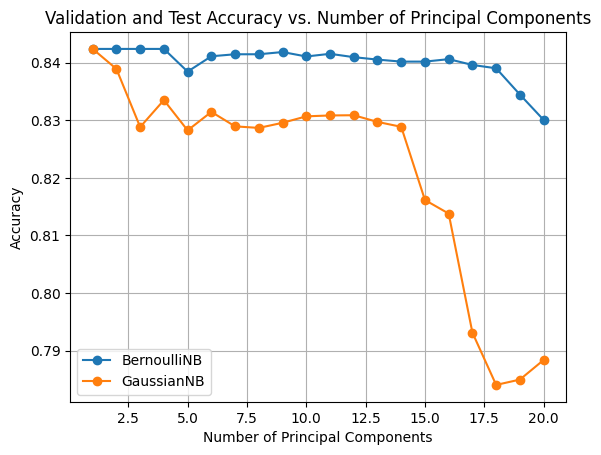

In [45]:
# List of classifiers to plot
classifiers = [
    (BernoulliNB(), "BernoulliNB"),
    (GaussianNB(), "GaussianNB")
]

# List of number of components to test
num_components_list = range(1,21)

# Plot accuracy vs. number of components
plot_accuracy_vs_components(
    classifiers,
    X_train_pca,
    y_train_pca,
    X_val_pca,
    y_val_pca,
    num_components_list,
    reverse=False
)

In [42]:
from sklearn.metrics import recall_score

# Function to plot recall on the positive class vs. number of principal components for two classifiers
def plot_recall_vs_components(classifiers, X_train_pca, y_train_pca, X_val_pca, y_val_pca, num_components_list):
    plt.figure(figsize=(10, 6))

    for nb_classifier, clf_name in classifiers:
        recalls = []

        for num_components in num_components_list:
            # Select the best components
            X_train_best_components = X_train_pca.iloc[:, :num_components]
            X_val_best_components = X_val_pca.iloc[:, :num_components]

            # Train the classifier
            nb_classifier.fit(X_train_best_components, y_train_pca)

            # Make predictions on the validation set
            y_val_pred = nb_classifier.predict(X_val_best_components)

            # Calculate the recall for the positive class
            recall = recall_score(y_val_pca, y_val_pred, pos_label=1)
            recalls.append(recall)

        # Plot the recall vs. number of principal components
        plt.plot(num_components_list, recalls, marker='o', label=f'{clf_name}')

    plt.xlabel('Number of Principal Components')
    plt.ylabel('Recall on Positive Class')
    plt.title('Recall on Positive Class vs. Number of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()

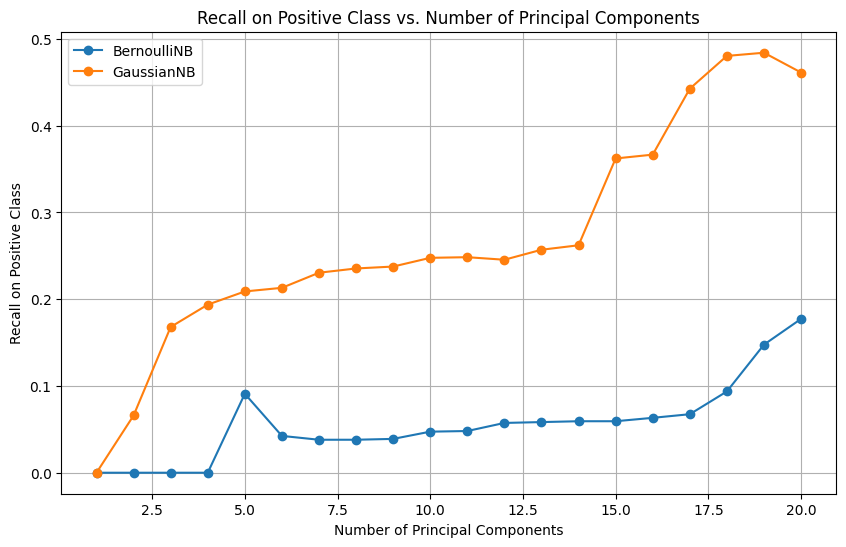

In [43]:
# Plot recall vs. number of components for both classifiers
plot_recall_vs_components(
    classifiers,
    X_train_pca,
    y_train_pca,
    X_val_pca,
    y_val_pca,
    num_components_list
)

Using only the first/best four components leads to the BernoulliNB classifier underfitting the problem and thus only naively predicting no diabetes. This changes with the addition of further components.

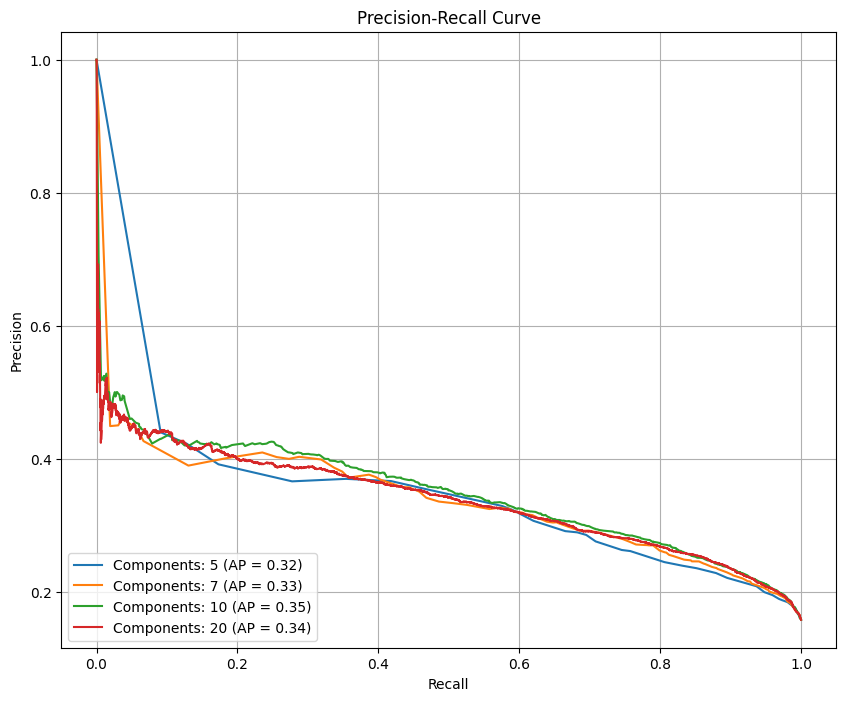

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(
    nb_classifier, X_train_pca, y_train_pca, X_val_pca, y_val_pca, num_components_list
):
    plt.figure(figsize=(10, 8))

    for num_components in num_components_list:
        # Select the best components
        X_train_best_components = X_train_pca.iloc[:, :num_components]
        X_val_best_components = X_val_pca.iloc[:, :num_components]

        # Train the classifier
        nb_classifier.fit(X_train_best_components, y_train_pca)

        # Predict probabilities
        y_val_prob = nb_classifier.predict_proba(X_val_best_components)[:, 1]

        # Compute Precision-Recall curve and average precision
        precision, recall, _ = precision_recall_curve(y_val_pca, y_val_prob)
        average_precision = average_precision_score(y_val_pca, y_val_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f"Components: {num_components} (AP = {average_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

# List of number of components to test
num_components_list = [5, 7, 10, 20]

# Plot Precision-Recall Curve
plot_precision_recall_curve(
    BernoulliNB(alpha=1),
    X_train_pca,
    y_train_pca,
    X_val_pca,
    y_val_pca,
    num_components_list,
)

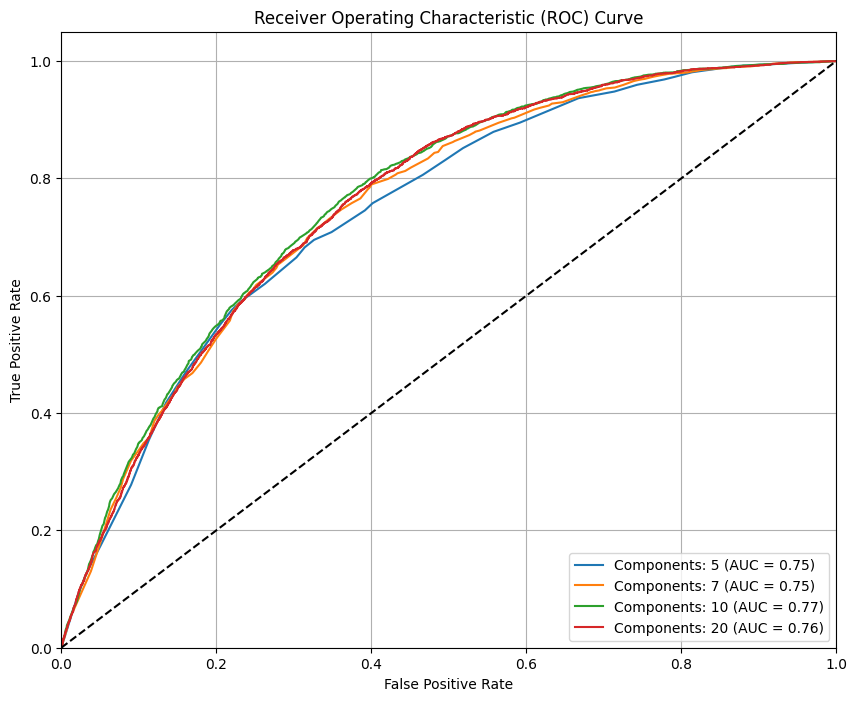

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# Function to plot ROC Curve
def plot_roc_curve(
    nb_classifier, X_train_pca, y_train_pca, X_val_pca, y_val_pca, num_components_list
):
    plt.figure(figsize=(10, 8))

    for num_components in num_components_list:
        # Select the best components
        X_train_best_components = X_train_pca.iloc[:, :num_components]
        X_val_best_components = X_val_pca.iloc[:, :num_components]

        # Train the classifier
        nb_classifier.fit(X_train_best_components, y_train_pca)

        # Predict probabilities
        y_val_prob = nb_classifier.predict_proba(X_val_best_components)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_val_pca, y_val_prob)
        roc_auc = roc_auc_score(y_val_pca, y_val_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"Components: {num_components} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


# List of number of components to test
num_components_list = [5, 7, 10, 20]

# Plot ROC Curve
plot_roc_curve(
    BernoulliNB(alpha=1),
    X_train_pca,
    y_train_pca,
    X_val_pca,
    y_val_pca,
    num_components_list,
)

The dimensionality reduction does not necessarily improve the performance of the classifiers (BernoulliNB and GaussianNB)

## Cross Validation with Sampling Techniques and PCA

To address the class imbalance, we now want to use several  over-sampling and under-sampling techniques. Additionally, we use cross-validation to ensure that the model's performance is robust and not dependent on a particular train-test split.

Imports and defining parameter grid

In [33]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('resampler', None),  # Placeholder for resampling method
    ('pca', None),  # Placeholder for PCA
    ('classifier', None)  # Placeholder for classifier
])

# Define the parameter grid for different Naive Bayes classifiers
param_grid_nb = [
    {'classifier': [GaussianNB()],
     'resampler': [None, 
                   RandomOverSampler(random_state=42),
                   RandomUnderSampler(random_state=42), 
                   SMOTE(random_state=42), 
                   SMOTETomek(random_state=42)],
     'pca': [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)],},

    {'classifier': [BernoulliNB()], 
     'classifier__alpha': [0.1, 0.5, 1.0, 5.0], 
     'resampler': [None,
                   RandomOverSampler(random_state=42), 
                   RandomUnderSampler(random_state=42), 
                   SMOTE(random_state=42), 
                   SMOTETomek(random_state=42)],
     'pca': [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)],},

    {'classifier': [CategoricalNB()], 
     'classifier__alpha': [0.1, 0.5, 1.0, 5.0], 
     'resampler': [None,
                   RandomOverSampler(random_state=42), 
                   RandomUnderSampler(random_state=42), 
                   SMOTE(random_state=42), 
                   SMOTETomek(random_state=42)],
     'pca': [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)],},
    {'classifier': [ComplementNB()], 
     'classifier__alpha': [0.1, 0.5, 1.0, 5.0], 
     'resampler': [None,
                   RandomOverSampler(random_state=42), 
                   RandomUnderSampler(random_state=42), 
                   SMOTE(random_state=42), 
                   SMOTETomek(random_state=42)],
     'pca': [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)],}
]

Surpress warnings for gridsearch

In [34]:
import warnings
warnings.filterwarnings("ignore")

Gridsearch for tuning on the metric Recall

In [46]:
# Set up GridSearchCV for Naive Bayes classifiers
halving_grid_search_nb = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_nb,
    cv=10,  # x-fold cross-validation
    scoring='recall',  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search_nb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search_nb.best_params_)
print("Best Cross-Validation Recall:", halving_grid_search_nb.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 260
n_resources: 730
Fitting 10 folds for each of 260 candidates, totalling 2600 fits
----------
iter: 1
n_candidates: 87
n_resources: 2190
Fitting 10 folds for each of 87 candidates, totalling 870 fits
----------
iter: 2
n_candidates: 29
n_resources: 6570
Fitting 10 folds for each of 29 candidates, totalling 290 fits
----------
iter: 3
n_candidates: 10
n_resources: 19710
Fitting 10 folds for each of 10 candidates, totalling 100 fits
----------
iter: 4
n_candidates: 4
n_resources: 59130
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'classifier': GaussianNB(), 'pca': PCA(), 'resampler': SMOTETomek(random_state=42)}
Best Cross-Validation Recall: 0.8757066870464086


In [47]:
best_nb_classifier = halving_grid_search_nb.best_estimator_

# Use the best estimator to make predictions on the validation set
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy with Best Parameters: 0.5408309178743962
              precision    recall  f1-score   support

         0.0       0.95      0.48      0.64     21797
         1.0       0.24      0.88      0.38      4078

    accuracy                           0.54     25875
   macro avg       0.60      0.68      0.51     25875
weighted avg       0.84      0.54      0.60     25875



In [48]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
best_model = halving_grid_search_nb.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/naive_bayes/nb_model_cv_recall_{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/naive_bayes/nb_model_cv_recall_20241129_111418.pkl'


F1-Score tuned Classifier

In [49]:
halving_grid_search_nb = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_nb,
    cv=10,  # x-fold cross-validation
    scoring='f1',  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search_nb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search_nb.best_params_)
print("Best Cross-Validation F1-Score:", halving_grid_search_nb.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 260
n_resources: 730
Fitting 10 folds for each of 260 candidates, totalling 2600 fits
----------
iter: 1
n_candidates: 87
n_resources: 2190
Fitting 10 folds for each of 87 candidates, totalling 870 fits
----------
iter: 2
n_candidates: 29
n_resources: 6570
Fitting 10 folds for each of 29 candidates, totalling 290 fits
----------
iter: 3
n_candidates: 10
n_resources: 19710
Fitting 10 folds for each of 10 candidates, totalling 100 fits
----------
iter: 4
n_candidates: 4
n_resources: 59130
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'classifier': CategoricalNB(), 'classifier__alpha': 5.0, 'pca': None, 'resampler': RandomOverSampler(random_state=42)}
Best Cross-Validation F1-Score: 0.46386848396692165


In [50]:
best_nb_classifier = halving_grid_search_nb.best_estimator_

# Use the best estimator to make predictions on the validation set
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy with Best Parameters: 0.7347246376811594


              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     21797
         1.0       0.34      0.72      0.46      4078

    accuracy                           0.73     25875
   macro avg       0.64      0.73      0.64     25875
weighted avg       0.84      0.73      0.77     25875



In [51]:
# Get the best model from the halving grid search
best_model = halving_grid_search_nb.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/naive_bayes/nb_model_cv_f1_{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/naive_bayes/nb_model_cv_f1_20241129_111525.pkl'


Accuracy tuned Classifier

In [52]:
halving_grid_search_nb = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_nb,
    cv=10,  # x-fold cross-validation
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search_nb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search_nb.best_params_)
print("Best Cross-Validation Accuracy:", halving_grid_search_nb.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 260
n_resources: 730
Fitting 10 folds for each of 260 candidates, totalling 2600 fits


----------
iter: 1
n_candidates: 87
n_resources: 2190
Fitting 10 folds for each of 87 candidates, totalling 870 fits
----------
iter: 2
n_candidates: 29
n_resources: 6570
Fitting 10 folds for each of 29 candidates, totalling 290 fits
----------
iter: 3
n_candidates: 10
n_resources: 19710
Fitting 10 folds for each of 10 candidates, totalling 100 fits
----------
iter: 4
n_candidates: 4
n_resources: 59130
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'classifier': BernoulliNB(), 'classifier__alpha': 1.0, 'pca': PCA(n_components=10), 'resampler': None}
Best Cross-Validation Accuracy: 0.8433517024139148


In [53]:
best_nb_classifier = halving_grid_search_nb.best_estimator_

# Use the best estimator to make predictions on the validation set
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy with Best Parameters: 0.8410821256038647
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     21797
         1.0       0.46      0.05      0.09      4078

    accuracy                           0.84     25875
   macro avg       0.65      0.52      0.50     25875
weighted avg       0.79      0.84      0.78     25875



In [54]:
# Get the best model from the halving grid search
best_model = halving_grid_search_nb.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/naive_bayes/nb_model_cv_accuracy_{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/naive_bayes/nb_model_cv_accuracy_20241129_111613.pkl'


ROC-AUC tuned Classifier

In [55]:
halving_grid_search_nb = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_nb,
    cv=10,  # x-fold cross-validation
    scoring='roc_auc',  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search_nb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search_nb.best_params_)
print("Best Cross-Validation Roc-Auc:", halving_grid_search_nb.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 260
n_resources: 730
Fitting 10 folds for each of 260 candidates, totalling 2600 fits
----------
iter: 1
n_candidates: 87
n_resources: 2190
Fitting 10 folds for each of 87 candidates, totalling 870 fits
----------
iter: 2
n_candidates: 29
n_resources: 6570
Fitting 10 folds for each of 29 candidates, totalling 290 fits
----------
iter: 3
n_candidates: 10
n_resources: 19710
Fitting 10 folds for each of 10 candidates, totalling 100 fits
----------
iter: 4
n_candidates: 4
n_resources: 59130
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'classifier': CategoricalNB(), 'classifier__alpha': 0.1, 'pca': None, 'resampler': RandomOverSampler(random_state=42)}
Best Cross-Validation Roc-Auc: 0.8062332898590625


In [56]:
best_nb_classifier = halving_grid_search_nb.best_estimator_

# Use the best estimator to make predictions on the validation set
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy with Best Parameters: 0.7346859903381643
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     21797
         1.0       0.34      0.72      0.46      4078

    accuracy                           0.73     25875
   macro avg       0.64      0.73      0.64     25875
weighted avg       0.84      0.73      0.77     25875



In [57]:
# Get the best model from the halving grid search
best_model = halving_grid_search_nb.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/naive_bayes/nb_model_cv_roc_auc_{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/naive_bayes/nb_model_cv_roc_auc_20241129_111713.pkl'


Precision tuned Classifier

In [58]:
halving_grid_search_nb = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_nb,
    cv=10,  # x-fold cross-validation
    scoring='precision',  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search_nb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search_nb.best_params_)
print("Best Cross-Validation Precision:", halving_grid_search_nb.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 260
n_resources: 730
Fitting 10 folds for each of 260 candidates, totalling 2600 fits
----------
iter: 1
n_candidates: 87
n_resources: 2190
Fitting 10 folds for each of 87 candidates, totalling 870 fits
----------
iter: 2
n_candidates: 29
n_resources: 6570
Fitting 10 folds for each of 29 candidates, totalling 290 fits
----------
iter: 3
n_candidates: 10
n_resources: 19710
Fitting 10 folds for each of 10 candidates, totalling 100 fits
----------
iter: 4
n_candidates: 4
n_resources: 59130
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'classifier': BernoulliNB(), 'classifier__alpha': 5.0, 'pca': PCA(n_components=10), 'resampler': None}
Best Cross-Validation Precision: 0.4725877017721696


In [59]:
best_nb_classifier = halving_grid_search_nb.best_estimator_

# Use the best estimator to make predictions on the validation set
y_val_pred = best_nb_classifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy with Best Parameters: 0.8410821256038647
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     21797
         1.0       0.46      0.05      0.09      4078

    accuracy                           0.84     25875
   macro avg       0.65      0.52      0.50     25875
weighted avg       0.79      0.84      0.78     25875



In [60]:
# Get the best model from the halving grid search
best_model = halving_grid_search_nb.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/naive_bayes/nb_model_cv_precision_{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/naive_bayes/nb_model_cv_precision_20241129_111752.pkl'


## Model Comparison

| **Parameters** | **Recall** | **F1 Score** | **Accuracy** | **ROC AUC** | **Precision** |
|-----|:---:|:---:|:---:|:---:|:---:|
| Classifier | Gaussian NB | Categorical NB | Bernoulli NB | Categorical NB | Categorical NB |
| Classifier_alpha | N/A | 0.5 | 0.5 | 0.1 | 0.1 |
| PCA | All components | None | 10 | None | None | 
| Sampling | Smote Over | Random Over | None | Random Over | None |
| Accuracy | 0.5406 | 0.7347 | 0.8411 | 0.7347 | 0.8411 |
| Precision - 0 | 0.95 | 0.93 | 0.85 | 0.93 | 0.85 |
| Precision - 1 | 0.24 | 0.34 | 0.46 | 0.34 | 0.46 |
| Recall - 0 | 0.48 | 0.74 | 0.99 | 0.74 | 0.99 |
| Recall - 1 | 0.88 | 0.72 | 0.05 | 0.72 | 0.05 |
| F1 - 0 | 0.64 | 0.82 | 0.91 | 0.82 | 0.91 |
| F1 - 1 | 0.38 | 0.46 | 0.09 | 0.46 | 0.09 |

In [61]:
# Load the previously stored models
model_files = [
    '../models/naive_bayes/nb_model_cv_recall_20241129_111418.pkl',
    '../models/naive_bayes/nb_model_cv_f1_20241129_111525.pkl',
    '../models/naive_bayes/nb_model_cv_accuracy_20241129_111613.pkl',
    '../models/naive_bayes/nb_model_cv_roc_auc_20241129_111713.pkl',
    '../models/naive_bayes/nb_model_cv_precision_20241129_111752.pkl'
]

models = [joblib.load(file) for file in model_files]
model_names = ['Recall Tuned', 'F1-Score Tuned', 'Accuracy Tuned', 'ROC-AUC Tuned', 'Precision Tuned']

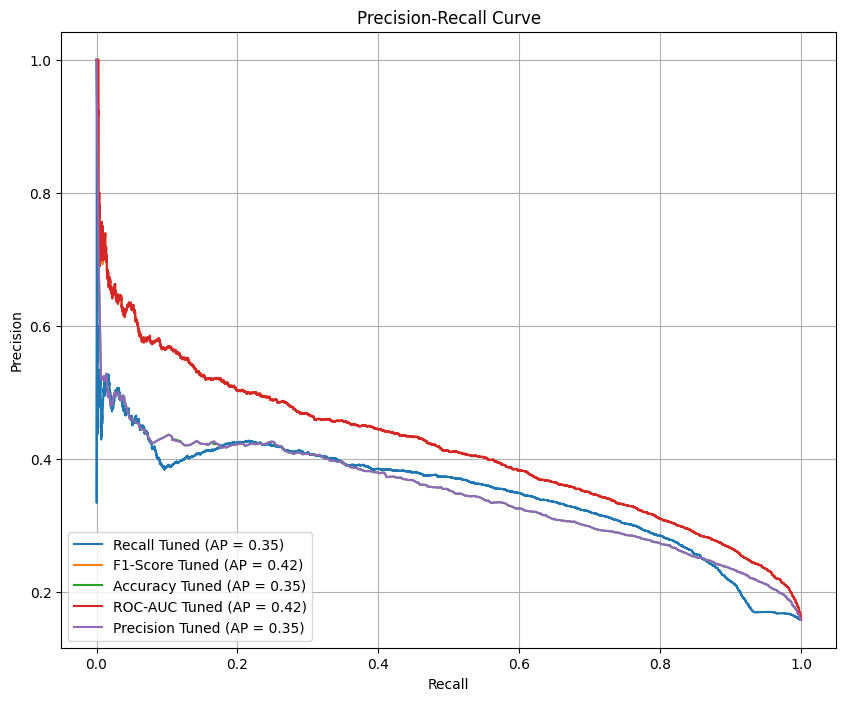

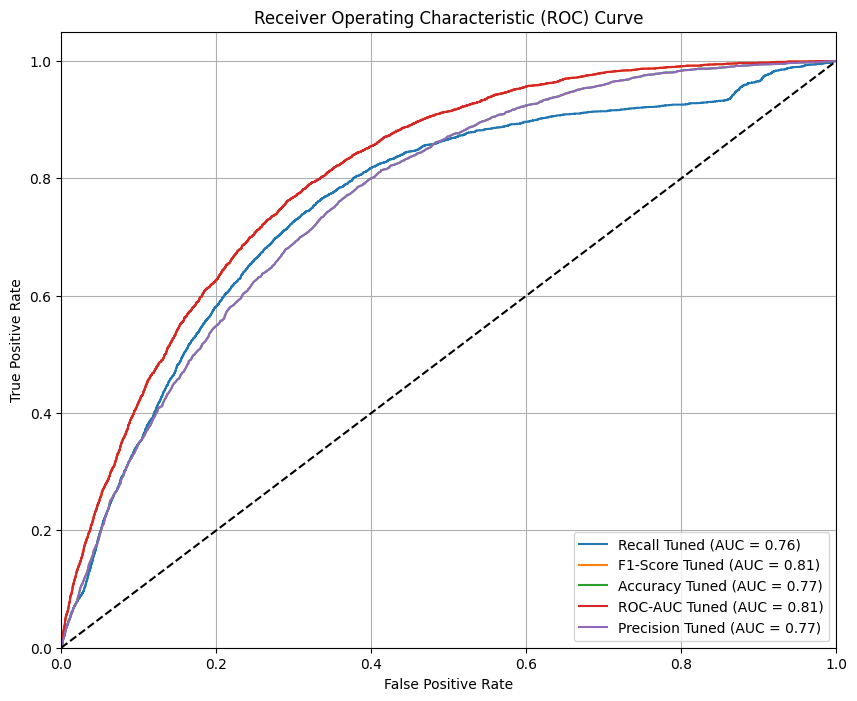

In [62]:
# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(models, model_names, X_val, y_val):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        # Predict probabilities
        y_val_prob = model.predict_proba(X_val)[:, 1]

        # Compute Precision-Recall curve and average precision
        precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
        average_precision = average_precision_score(y_val, y_val_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f"{name} (AP = {average_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(models, model_names, X_val, y_val):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        # Predict probabilities
        y_val_prob = model.predict_proba(X_val)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_val, y_val_prob)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot Precision-Recall Curve
plot_precision_recall_curve(models, model_names, X_val, y_val)

# Plot ROC Curve
plot_roc_curve(models, model_names, X_val, y_val)

When tuning on the scoring metrics **F1-Score** and **ROC-AUC** the classifiers yield the best performance for Naive Bayes Classifiers. Especially the Categorical Naive Bayes Classifier has the best capabilities to distinguish between the people with and without diabetes